In [1]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Now you can access files in your Drive using '/content/drive/MyDrive/...'
file_path = '/content/drive/MyDrive/playground-series-may-swag.zip'

# Verify file existence:
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"File not found at: {file_path}")

Mounted at /content/drive
File found at: /content/drive/MyDrive/playground-series-may-swag.zip


In [2]:

import os
import zipfile

zip_path = "/content/drive/MyDrive/playground-series-may-swag.zip"  # Path to your zip file
extract_dir = "/content/drive/MyDrive/playground-series-may-swag"  # Directory to extract to

# Check if the zip file exists
if os.path.exists(zip_path):
    print(f"File found at: {zip_path}")

    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"File extracted to: {extract_dir}")
else:
    print(f"File not found at: {zip_path}")
    print("Please verify the file path and ensure the file exists in your Google Drive.")



File found at: /content/drive/MyDrive/playground-series-may-swag.zip
File extracted to: /content/drive/MyDrive/playground-series-may-swag


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("/content/drive/MyDrive/playground-series-may-swag/train.csv")
test = pd.read_csv("/content/drive/MyDrive/playground-series-may-swag/test.csv")
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [6]:
train['BMI'] = train['Weight'] / (train['Height'] / 100) ** 2
test['BMI'] = test['Weight'] / (test['Height'] / 100) ** 2

In [7]:
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740
...,...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527


In [8]:
def hr_zone(hr):
  if hr<90: return 'Low'
  elif hr<110: return 'Moderate'
  else: return 'High'
train['Heart_zone'] = train['Heart_Rate'].apply(hr_zone)
test['Heart_zone'] = test['Heart_Rate'].apply(hr_zone)

In [9]:
def age_group(age):
  if age<30: return 'Young'
  elif age<50: return 'Middle'
  else: return 'Old'
train['Age_group'] = train['Age'].apply(age_group)
test['Age_group'] = test['Age'].apply(age_group)

In [11]:
train['HR_Duration'] = train['Duration'] / train['Heart_Rate']
test['HR_Duration'] = test['Duration'] / test['Heart_Rate']
train['Temp_duration'] = train['Duration'] / train['Body_Temp']
test['Temp_duration'] = test['Duration'] / test['Body_Temp']
train['Temp_duration']

,Temp_duration
0,0.634146
1,0.201511
2,0.175879
3,0.614251
4,0.615764
...,...
749995,0.733496
749996,0.444444
749997,0.709046
749998,0.421836


In [12]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})
test['Sex'] = test['Sex'].map({'female':0,'male':1})
train['Age_group'] = train['Age_group'].map({'Young':0,'Middle':1,'Old':2})
test['Age_group'] = test['Age_group'].map({'Young':0,'Middle':1,'Old':2})
train['Heart_zone'] = train['Heart_zone'].map({'Low':0,'Moderate':1,'High':2})
test['Heart_zone'] = test['Heart_zone'].map({'Low':0,'Moderate':1,'High':2})

In [14]:
train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Heart_zone,Age_group,HR_Duration,Temp_duration
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,1,1,0.257426,0.634146
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,0,2,0.094118,0.201511
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,0,2,0.083333,0.175879
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,1,0,0.238095,0.614251
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,1,1,0.245098,0.615764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968,2,0,0.263158,0.733496
749996,749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496,1,2,0.195652,0.444444
749997,749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645,2,2,0.256637,0.709046
749998,749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527,1,1,0.166667,0.421836


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             750000 non-null  int64  
 1   Sex            750000 non-null  int64  
 2   Age            750000 non-null  int64  
 3   Height         750000 non-null  float64
 4   Weight         750000 non-null  float64
 5   Duration       750000 non-null  float64
 6   Heart_Rate     750000 non-null  float64
 7   Body_Temp      750000 non-null  float64
 8   Calories       750000 non-null  float64
 9   BMI            750000 non-null  float64
 10  Heart_zone     750000 non-null  int64  
 11  Age_group      750000 non-null  int64  
 12  HR_Duration    750000 non-null  float64
 13  Temp_duration  750000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 80.1 MB


In [16]:
train = train.drop(columns=['id'])
train

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Heart_zone,Age_group,HR_Duration,Temp_duration
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,1,1,0.257426,0.634146
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,0,2,0.094118,0.201511
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,0,2,0.083333,0.175879
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,1,0,0.238095,0.614251
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,1,1,0.245098,0.615764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968,2,0,0.263158,0.733496
749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496,1,2,0.195652,0.444444
749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645,2,2,0.256637,0.709046
749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527,1,1,0.166667,0.421836


In [17]:
numeric_cols = train.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Heart_zone,Age_group,HR_Duration,Temp_duration
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,1,1,0.257426,0.634146
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,0,2,0.094118,0.201511
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,0,2,0.083333,0.175879
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,1,0,0.238095,0.614251
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,1,1,0.245098,0.615764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968,2,0,0.263158,0.733496
749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496,1,2,0.195652,0.444444
749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645,2,2,0.256637,0.709046
749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527,1,1,0.166667,0.421836


In [18]:
skew_value = numeric_cols.skew().sort_values(ascending=False)
skew_value

,0
Calories,0.539196
Age,0.436397
Weight,0.211194
Height,0.051777
Duration,0.026259
Temp_duration,0.009035
Sex,0.003845
BMI,-0.003291
Heart_Rate,-0.005668
Heart_zone,-0.016647


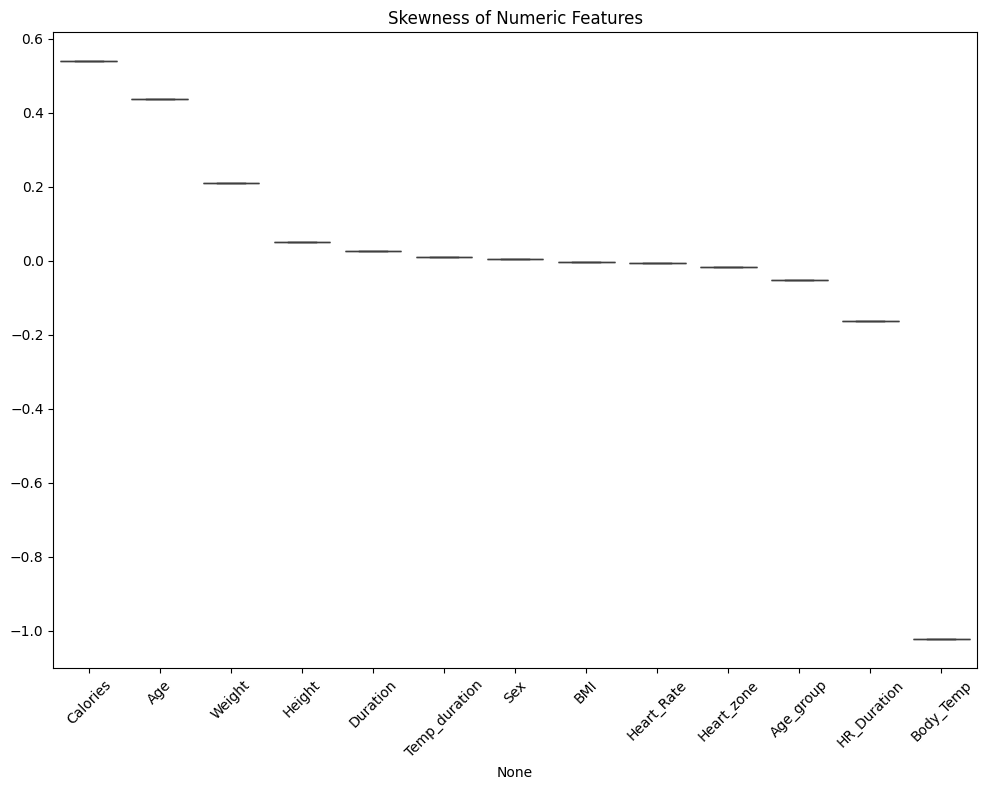

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x=skew_value.index,y=skew_value.values)
plt.title('Skewness of Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

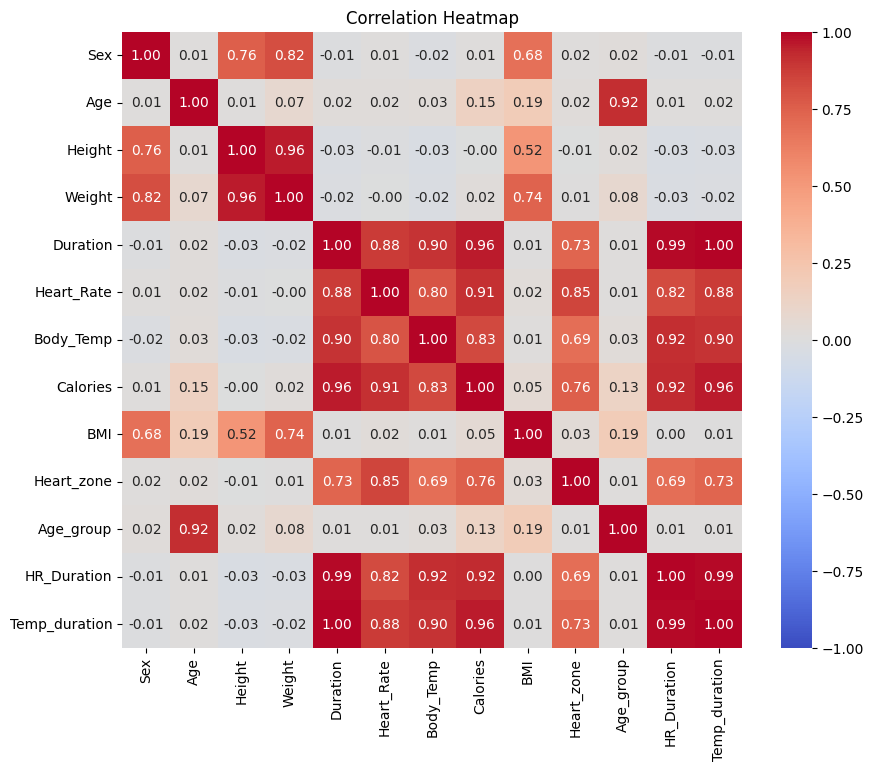

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [21]:
import pandas as pd
import numpy as np
import os
import time
import logging
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



from tqdm.auto import tqdm
from itertools import combinations
import warnings
warnings.simplefilter('ignore')


In [22]:
X = train.drop(columns=["Calories"])
y = np.log1p(train["Calories"])
X_test = test.drop(columns=["id"])

In [23]:
FOLDS = 5
FEATURES = X.columns.tolist()

# KFold setup
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

# Arrays to store predictions
oof = np.zeros(len(train))
pred = np.zeros(len(test))

# Start CV loop
for i, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    print(f"\n{'#'*10} Fold {i+1} {'#'*10}")

    x_train = X.iloc[train_idx].copy()
    y_train = y.iloc[train_idx]
    x_valid = X.iloc[valid_idx].copy()
    y_valid = y.iloc[valid_idx]
    x_test = X_test.copy()

    # No categorical target encoding in this dataset, but you can add if needed

    start = time.time()
    # Train model
    model = XGBRegressor(
        device="cuda" if XGBRegressor().get_params().get("device") == "cuda" else "cpu",
        max_depth=10,
        colsample_bytree=0.7,
        subsample=0.9,
        n_estimators=2000,
        learning_rate=0.02,
        gamma=0.01,
        max_delta_step=2,
        early_stopping_rounds=100,
        eval_metric="rmse",
        enable_categorical=True
    )

    model.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=100
    )

    # Predict OOF and test
    oof[valid_idx] = model.predict(x_valid)
    pred += model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_valid, oof[valid_idx]))
    print(f"Fold {i+1} RMSE: {rmse:.4f}")
    print(f"Feature engineering & training time: {time.time() - start:.1f} sec")

# Average test predictions
pred /= FOLDS

# Final RMSE
full_rmse = np.sqrt(mean_squared_error(y, oof))
print(f"\nFinal CV RMSE: {full_rmse:.4f}")




########## Fold 1 ##########
[0]	validation_0-rmse:0.94439
[100]	validation_0-rmse:0.14342
[200]	validation_0-rmse:0.06296
[300]	validation_0-rmse:0.05973
[400]	validation_0-rmse:0.05954
[500]	validation_0-rmse:0.05953
[549]	validation_0-rmse:0.05954
Fold 1 RMSE: 0.0595
Feature engineering & training time: 65.8 sec

########## Fold 2 ##########
[0]	validation_0-rmse:0.94683
[100]	validation_0-rmse:0.14440
[200]	validation_0-rmse:0.06403
[300]	validation_0-rmse:0.06069
[400]	validation_0-rmse:0.06047
[500]	validation_0-rmse:0.06045
[573]	validation_0-rmse:0.06046
Fold 2 RMSE: 0.0604
Feature engineering & training time: 68.1 sec

########## Fold 3 ##########
[0]	validation_0-rmse:0.94544
[100]	validation_0-rmse:0.14350
[200]	validation_0-rmse:0.06311
[300]	validation_0-rmse:0.05992
[400]	validation_0-rmse:0.05973
[500]	validation_0-rmse:0.05974
[541]	validation_0-rmse:0.05974
Fold 3 RMSE: 0.0597
Feature engineering & training time: 64.7 sec

########## Fold 4 ##########
[0]	validation_0

In [24]:

y_preds = np.expm1(pred)
print('predict mean :',y_preds.mean())
print('predict median :',np.median(y_preds))

y_preds = np.clip(y_preds,1,314)
print('predict mean after clip:',y_preds.mean())
print('predict median after clip:',np.median(y_preds))

predict mean : 88.16457678720825
predict median : 76.38895725093238
predict mean after clip: 88.16457685117224
predict median after clip: 76.38895725093238
